In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv('data/sample.csv')
# sample_df=df.iloc[:, 1:].rename(columns={'target': 'label'})

In [9]:
df.head()

,label,text
0,0,"@vivmondo Haha, it did not feel like a win at ..."
1,0,again stuck with javascript #web2.0 designer ...
2,0,Exhausted...terrible week
3,0,@dstarr I want my bed x
4,0,Hayley is awake &amp; screaming (sick ). I'll...


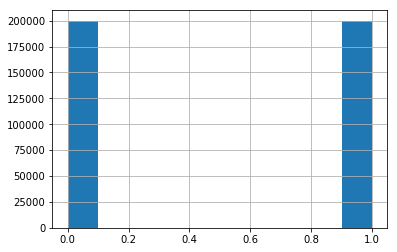

In [10]:
df['label'].hist()

In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()
analyzer.polarity_scores('Today is a good day.')

{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}

In [13]:
from sklearn.model_selection import train_test_split

X=df['text']
y=df['label']
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=.9)

In [15]:
def get_vader_score(sentence): 
    compound=analyzer.polarity_scores(sentence)['compound']
    if compound > 0.05: 
        return 1
    elif (compound >= -0.05) and (compound <=0.05): 
        return None
    else: 
        return 0
# df['vader']=df.apply(lambda x: analyzer.polarity_scores(x['text'])['compound'], axis=1)


In [19]:
result_df=pd.concat([X_test, y_test], axis=1)
result_df['vader']=result_df.apply(lambda x: get_vader_score(x['text']), axis=1)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(result_df.dropna()['label'].values, result_df.dropna()['vader'].values)

0.7205595649348429

In [ ]:
# 0.7180804295695487

In [22]:
print(f'Accuracy: {accuracy_score(result_df.dropna()["label"].values, result_df.dropna()["vader"].values)}')

Accuracy: 0.7205595649348429


In [50]:
header=['label', 'time', 'date', 'query', 'username', 'text']
df=pd.read_csv('data/training-1600000-processed-noemoticon.csv', names=header)
df['label'] = df['label'].map({0:0,4:1})

In [15]:
df.head()

,label,time,date,query,username,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [16]:
df[df['text'].str.contains('Three point contest')]

,label,time,date,query,username,text
95665,0,1792171427,Wed May 13 22:20:28 PDT 2009,NO_QUERY,GCJerk,Three point contest ended do to roof moving :\


In [29]:
sample_df=pd.read_csv('data/testing_results.csv', doublequote=False, names=['target', 'text', 'label', 'predicted'])
sample_df.head()

,target,text,label,predicted
0,0,@Kwesidei not the whole crew,0.0,1.0
1,0,@LOLTrish hey long time no see! Yes.. Rains a...,0.0,1.0
2,0,@twittera que me muera ?,0.0,1.0
3,0,"@octolinz16 It it counts, idk why I did either...",0.0,0.0
4,0,Hollis' death scene will hurt me severely to w...,0.0,0.0


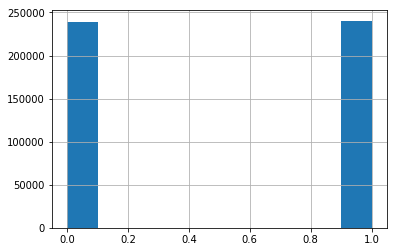

In [31]:
sample_df['label'].hist()

In [128]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()
analyzer.polarity_scores('Today is a good day.')

{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}

In [52]:
def get_vader_score(sentence): 
    compound=analyzer.polarity_scores(sentence)['compound']
    if compound > 0.05: 
        return 1
    elif (compound >= -0.05) and (compound <=0.05): 
        return None
    else: 
        return 0
# df['vader']=df.apply(lambda x: analyzer.polarity_scores(x['text'])['compound'], axis=1)
df['vader']=df.apply(lambda x: get_vader_score(x['text']), axis=1)

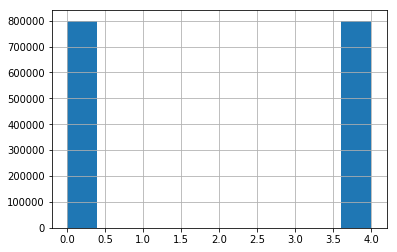

In [38]:
df['label'].hist()

In [132]:
from sklearn.metrics import accuracy_score
accuracy_score(df.dropna()['label'].values, df.dropna()['vader'].values)

0.7180804295695487